In [12]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def insert(self, prev_node, data):
        """指定したノードの後ろに新しいノードを追加"""
        if not prev_node:
            print("prev_node がありません.")
            return

        new_node = Node(data)
        new_node.next = prev_node.next
        prev_node.next = new_node
        
    def delete(self, prev_node):
        """指定したノードの後ろのノードを削除"""
        if not prev_node:
            print("prev_node がありません.")
            return

        prev_node.next = prev_node.next.next
        
    def first(self):
        """リストの先頭のノードを返す"""
        return self.head
    
    def last(self):
        """リストの末尾のノードを返す"""
        last_node = self.head
        while last_node.next:
            last_node = last_node.next
        return last_node
    
    def find(self, data):
        """指定したデータを持つ最初のノードを返す"""
        current_node = self.head
        while current_node and current_node.data != data:
            current_node = current_node.next
        return current_node

    def locate(self, index):
        """指定したインデックスのノードを返す"""
        current_node = self.head
        position = 0
        while current_node and position != index:
            current_node = current_node.next
            position += 1
        return current_node
    
    def next(self, node):
        """指定したノードの次のノードを返す"""
        return node.next
    
    def prev(self, node):
        """指定したノードの前のノードを返す"""
        current_node = self.head
        while current_node and current_node.next != node:
            current_node = current_node.next
        return current_node

    def append(self, data):
        """リストの末尾に新しいノードを追加"""
        new_node = Node(data)
        if not self.head: # リストが空の場合
            self.head = new_node
            return

        last_node = self.head
        while last_node.next: # リストの末尾を探す
            last_node = last_node.next
        last_node.next = new_node
    
    def prepend(self, data):
        """リストの先頭に新しいノードを追加"""
        new_node = Node(data)
        new_node.next = self.head
        self.head = new_node
    
    def delete_data(self, data):
        """指定したデータを持つ最初のノードを削除"""
        current_node = self.head
        if current_node and current_node.data == data: # リストの先頭だけ特別扱い
            self.head = current_node.next
            current_node = None
            return

        prev_node = None
        while current_node and current_node.data != data:
            prev_node = current_node
            current_node = current_node.next

        if not current_node:
            return

        prev_node.next = current_node.next
        current_node = None

    def print_list(self):
        """リストの要素を表示"""
        current_node = self.head
        while current_node:
            print(current_node.data, end=" -> ")
            current_node = current_node.next
        print("None")



## 簡単にテスト
とりあえず，簡単にテストしてみよう


In [13]:
# 使用例
llist = LinkedList()
llist.append(1)
llist.append(2)
llist.append(3)
llist.append(4)
llist.print_list()  # 1 -> 2 -> 3 -> 4 -> None

llist.insert(llist.head.next, 2.5)
llist.print_list()  # 1 -> 2 -> 2.5 -> 3 -> 4 -> None

llist.delete_data(2.5)
llist.print_list()  # 1 -> 2 -> 3 -> 4 -> None


1 -> 2 -> 3 -> 4 -> None
1 -> 2 -> 2.5 -> 3 -> 4 -> None
1 -> 2 -> 3 -> 4 -> None


In [21]:
# prepend と delete のテスト

llist = LinkedList()
llist.prepend(1)
llist.prepend(2)
llist.prepend(3)
llist.prepend(4)
llist.print_list()  # 4 -> 3 -> 2 -> 1 -> None

4 -> 3 -> 2 -> 1 -> None


In [22]:
# p に 3 のノードを指させる

p = llist.find(3)
print(p.data) # 3

# その前後のデータを表示
print("next: ", llist.next(p).data)
print("prev: ", llist.prev(p).data)

# p の後ろに3.5を挿入して見る
llist.insert(p, 3.5)
print(llist.next(p).data)


3
next:  2
prev:  4
3.5


In [23]:
print(llist.first().data)
print(llist.last().data)

4
1


In [ ]:
## それじゃ時間を計測する

n = 10, 50, 100, 500, 1000, 5000, 10000 とリストを増やしていくものとして，

- append() でリストの末尾に要素を追加する場合
- insert() でリストの先頭に要素を追加する場合

で，どの程度時間がかわるのかを計測してみる


In [30]:
import timeit

def test_append(n):
    llist = LinkedList()
    for i in range(n):
        llist.append(i) # 末尾に追加
        
def test_prepend(n):
    llist = LinkedList()
    for i in range(n):
        llist.prepend(i) # 先頭に追加
        
        
# とりあえず，リストのサイズを10000にして計測してみる
list_size = 10000

time_append = timeit.timeit(lambda: test_append(list_size), number=10)
time_prepend = timeit.timeit(lambda: test_prepend(list_size), number=10)

print("append: ", time_append)
print("prepend: ", time_prepend)


append:  25.470613750017947
prepend:  0.15273754199733958


In [36]:
import matplotlib.pyplot as plt
from tqdm import tqdm # 時間が遅くて不安になるのでプログレスバーを表示する

list_sizes = [10, 50, 100, 500, 1000, 5000, 10000]

append_times = []
prepend_times = []

for size in tqdm(list_sizes):
    time_append = timeit.timeit(lambda: test_append(size), number=10)
    time_prepend = timeit.timeit(lambda: test_prepend(size), number=10)
    append_times.append(time_append)
    prepend_times.append(time_prepend)


100%|██████████| 7/7 [05:20<00:00, 45.78s/it]


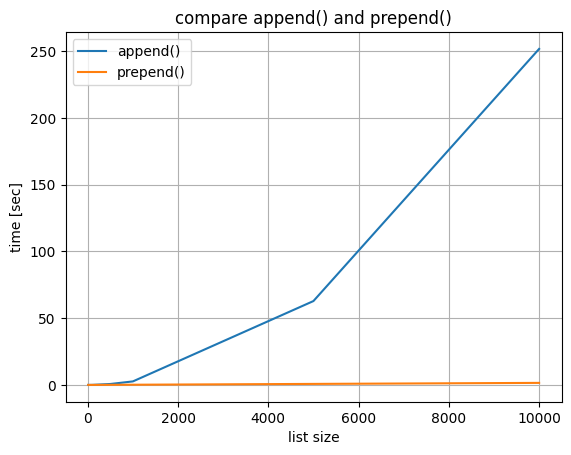

In [37]:
plt.plot(list_sizes, append_times, label="append()")
plt.plot(list_sizes, prepend_times, label="prepend()")
plt.xlabel("list size")
plt.ylabel("time [sec]")
plt.title('compare append() and prepend()')
plt.legend()
plt.grid()

`append()` がリストの末尾を探してから挿入するのに対して， `prepend()` は常に先頭に挿入していくため，実行時間に $\cal{O}(n)$ の分だけ差が出るのが実感できるかと思う